In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
# Data from pre-VSS experiment
df = pd.read_csv('crowdingReadingAcuity_dec24_cleaned.csv').iloc[:,1:]
df['crowding_L5_var'] = np.var(df[['crowding_L5_test', 'crowding_L5_retest']], axis=1)
df['crowding_R5_var'] = np.var(df[['crowding_R5_test', 'crowding_R5_retest']], axis=1)

In [3]:
df

,participant,ProlificParticipantID,crowding_L5_test,crowding_R5_test,crowding_L5_retest,crowding_R5_retest,reading_Beaver_test,reading_Winter_retest,rsvp_foveal_test,rsvp_foveal_retest,...,crowding_R,crowding_L,crowding,rsvp,reading,crowding_var,rsvp_var,reading_var,crowding_L5_var,crowding_R5_var
0,AlertGreenBat408,5d1e4a3ed4b9d60001ec8f1c,0.115156,0.305483,-0.124971,0.315851,2.115644,2.234645,2.996684,2.964187,...,0.310667,-0.004907,0.152880,2.980435,2.175145,0.042824,0.000528,0.007081,0.014415,2.687121e-05
1,AlertNeonBat971,5cbab879d7ebf300167feea4,0.127040,-0.130770,0.047602,-0.145697,2.286359,2.408637,3.100061,2.983906,...,-0.138233,0.087321,-0.025456,3.041983,2.347498,0.018047,0.006746,0.007476,0.001578,5.570141e-05
2,AlertNeonMouse999,66bce8ffb61a51410b552a2d,-0.431417,-0.188759,0.049006,-0.099462,2.495096,2.461877,2.570615,2.943560,...,-0.144110,-0.191206,-0.167658,2.757088,2.478487,0.040536,0.069544,0.000552,0.057701,1.993470e-03
3,AlertSkyBird989,672501c7bc2f7f52114f2a5e,-0.143431,0.197870,-0.171548,-0.213859,2.508871,2.440305,3.377244,3.466117,...,-0.007995,-0.157489,-0.082742,3.421680,2.474588,0.035835,0.003949,0.002351,0.000198,4.238002e-02
4,AlertYellowFox366,5f4538b6ffe9f50c3cbe3ae1,0.006815,-0.294273,-0.190656,-0.315644,2.519304,2.594551,2.835489,2.887658,...,-0.304959,-0.091921,-0.198440,2.861573,2.556927,0.021704,0.001361,0.002831,0.009749,1.141868e-04
5,BraveBronzeGrape583,673b051541d4c485962acf64,-0.501696,-0.110752,-0.007919,0.031904,2.535965,2.486642,3.077061,3.088005,...,-0.039424,-0.254807,-0.147116,3.082533,2.511303,0.059491,0.000060,0.001216,0.060954,5.087666e-03
6,BraveSilverBanana158,58ccfada8460040001e1ec4f,-0.401922,0.028889,-0.428116,-0.282591,2.599077,2.589742,3.432657,3.398882,...,-0.126851,-0.415019,-0.270935,3.415769,2.594409,0.043964,0.000570,0.000044,0.000172,2.425483e-02
7,BrightBronzeOrange862,66a1026d9687314647aac148,0.515975,0.300820,0.503478,0.366703,2.265972,2.204612,2.823444,2.795922,...,0.333762,0.509727,0.421744,2.809683,2.235292,0.011071,0.000379,0.001883,0.000039,1.085144e-03
8,BusyRedPig475,671ea8aa6fe43d49c85d039f,0.283547,0.155971,0.291681,-0.107080,2.524331,2.292861,2.932765,2.711643,...,0.024446,0.287614,0.156030,2.822204,2.408596,0.034630,0.024448,0.026789,0.000017,1.729891e-02
9,CleverBlueFox269,5fdfd04b9bf07d83b2e5f780,0.478116,0.367641,0.469281,0.276685,2.318115,2.404628,2.744126,2.726752,...,0.322163,0.473699,0.397931,2.735439,2.361371,0.009046,0.000151,0.003742,0.000020,2.068227e-03


In [4]:
np.sqrt(.016)*2/.06

4.216370213557839

In [5]:
def tls_regression(x_vals, y_vals):
    """Compute Total Least Squares (orthogonal) regression slope and intercept."""
    x_mean, y_mean = x_vals.mean(), y_vals.mean()
    Sxx = np.sum((x_vals - x_mean)**2)
    Syy = np.sum((y_vals - y_mean)**2)
    Sxy = np.sum((x_vals - x_mean)*(y_vals - y_mean))
    # TLS slope formula
    slope = (Syy - Sxx + np.sqrt((Sxx - Syy)**2 + 4*Sxy**2)) / (2*Sxy)
    intercept = y_mean - slope * x_mean
    return slope, intercept

## SAMPLING

In [6]:
# Parameters: you can change these to your desired values
mu_x, mu_y = 0.25, 2.9
var_x, var_y = 0.025, 0.06
rho = 0.6

# Construct covariance matrix
cov_xy = rho * np.sqrt(var_x * var_y)
cov_matrix = np.array([[var_x, cov_xy],
                       [cov_xy, var_y]])

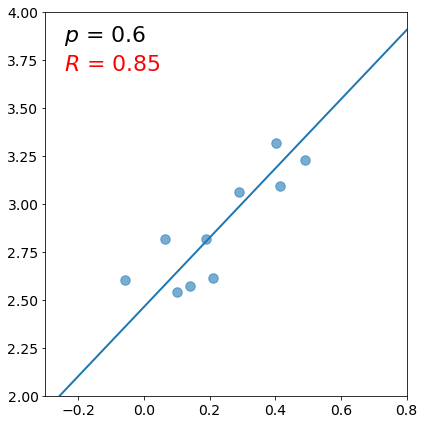

In [7]:
# --- 10 participants ---

# Draw samples
n_points = 10
x, y = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, size=n_points).T

slope, intercept = tls_regression(x, y)
r_value, p_value = pearsonr(x, y)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=90, alpha=.6)
x_line = np.linspace(-3, 3, 100)
plt.plot(x_line, slope * x_line + intercept, linewidth=2, label='TLS fit')
plt.text(0.05, 0.97, f'$p$ = 0.6',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='black')
plt.text(0.05, 0.89, f'$R$ = {r_value:.2f}',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='red')
plt.xlim(-.3, .8)
plt.ylim(2, 4)
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()

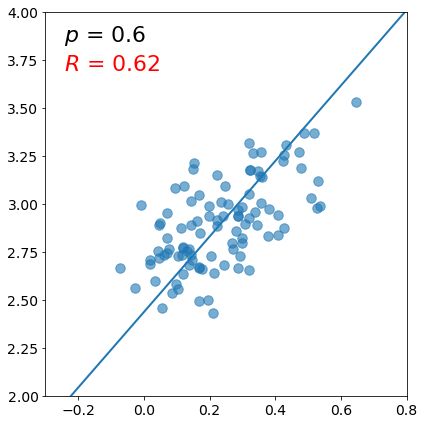

In [8]:
# --- 100 participants ---

# Draw samples
n_points = 100
x, y = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, size=n_points).T

slope, intercept = tls_regression(x, y)
r_value, p_value = pearsonr(x, y)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=90, alpha=.6)
x_line = np.linspace(-3, 3, 100)
plt.plot(x_line, slope * x_line + intercept, linewidth=2, label='TLS fit')
plt.text(0.05, 0.97, f'$p$ = 0.6',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='black')
plt.text(0.05, 0.89, f'$R$ = {r_value:.2f}',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='red')
plt.xlim(-.3, .8)
plt.ylim(2, 4)
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()

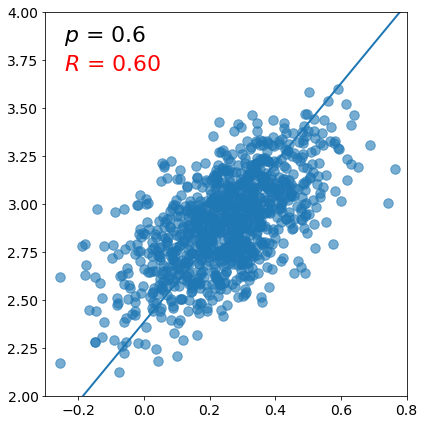

In [9]:
# --- 1000 participants ---

# Draw samples
n_points = 1000
x, y = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, size=n_points).T

slope, intercept = tls_regression(x, y)
r_value, p_value = pearsonr(x, y)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=90, alpha=.6)
x_line = np.linspace(-3, 3, 100)
plt.plot(x_line, slope * x_line + intercept, linewidth=2, label='TLS fit')
plt.text(0.05, 0.97, f'$p$ = 0.6',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='black')
plt.text(0.05, 0.89, f'$R$ = {r_value:.2f}',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='red')
plt.xlim(-.3, .8)
plt.ylim(2, 4)
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()

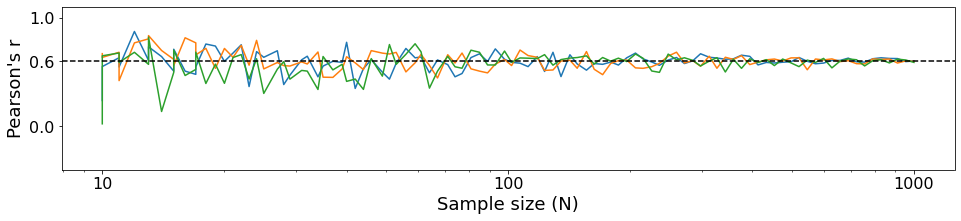

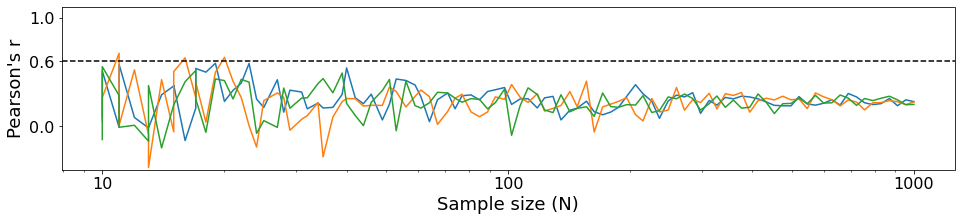

In [10]:
# Define a range of sample sizes
sample_sizes = np.logspace(1, 3, num=100).round().astype(int)
n_traces = 3  # number of replicate traces
noise_var = .06

# Preallocate array to hold Pearson r values
results = np.empty((n_traces, sample_sizes.size))
results_noisy = np.empty((n_traces, sample_sizes.size))

# Simulate and compute Pearson r for each trace and sample size
for t in range(n_traces):
    for idx, N in enumerate(sample_sizes):
        data = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, size=N)
        noise = np.random.normal(0, np.sqrt(noise_var), size=data.shape)
        noisy_data = data + noise
        r, _ = pearsonr(data[:, 0], data[:, 1])
        r_noisy, _ = pearsonr(noisy_data[:, 0], noisy_data[:, 1])
        results[t, idx] = r
        results_noisy[t, idx] = r_noisy

plt.figure(figsize=(16, 3))
for t in range(n_traces):
    plt.plot(sample_sizes, results[t])#, label=f'Simulation {t+1}')
plt.axhline(0.6, color='black', ls='--', label = 'True R')
plt.xlabel('Sample size (N)', size=18)
plt.ylabel("Pearson's r", size=18)
plt.xticks(size=16)
plt.yticks([0, 0.6, 1], size=16)
plt.xscale('log')
plt.ylim(-.4,1.1)
ax = plt.gca()
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.tick_params(axis='x', labelsize=16)

plt.figure(figsize=(16, 3))
for t in range(n_traces):
    plt.plot(sample_sizes, results_noisy[t])#, label=f'Simulation {t+1}')
plt.axhline(0.6, color='black', ls='--', label = 'True R')
plt.xlabel('Sample size (N)', size=18)
plt.ylabel("Pearson's r", size=18)
plt.xticks(size=16)
plt.yticks([0, 0.6, 1], size=16)
plt.xscale('log')
plt.ylim(-.4,1.1)
ax = plt.gca()
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.tick_params(axis='x', labelsize=16)


plt.show()

## NOISE

In [11]:
# Parameters
mu_x, mu_y = 0.25, 2.9
var_x, var_y, noise_var = 0.06, 0.06, 0.06
rho = 0.6
n_points = 10

cov_xy = rho * np.sqrt(var_x * var_y)
cov_matrix = np.array([[var_x, cov_xy],
                       [cov_xy, var_y]])

# Draw samples
x, y = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, size=n_points).T

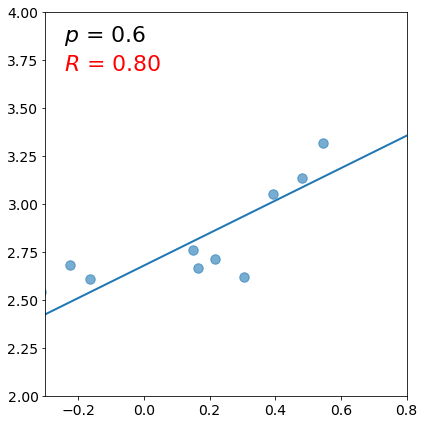

In [12]:
# Colors for each point
colors = plt.cm.tab10(np.arange(n_points))

# --- Plot 1: Original Data ---
slope, intercept = tls_regression(x, y)
r_value, p_value = pearsonr(x, y)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=90, alpha=.6)
x_line = np.linspace(-3, 3, 100)
plt.plot(x_line, slope * x_line + intercept, linewidth=2, label='TLS fit')
plt.text(0.05, 0.97, f'$p$ = 0.6',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='black')
plt.text(0.05, 0.89, f'$R$ = {r_value:.2f}',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='red')
plt.xlim(-.3, .8)
plt.ylim(2, 4)
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()

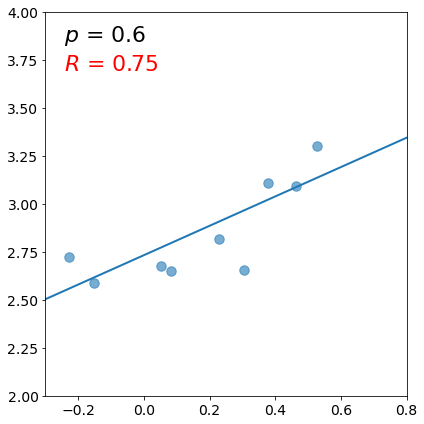

In [13]:
# --- Plot 2: Data with Moderate Noise ---
m = 0.1
x_noisy = x + np.random.normal(0, np.sqrt(noise_var*m), n_points)
y_noisy = y + np.random.normal(0, np.sqrt(noise_var*m), n_points)
slope_n, intercept_n = tls_regression(x_noisy, y_noisy)
r_value, p_value = pearsonr(x_noisy, y_noisy)

plt.figure(figsize=(6, 6))
plt.scatter(x_noisy, y_noisy, s=90, alpha=.6)
x_line = np.linspace(-3, 3, 100)
plt.plot(x_line, slope_n * x_line + intercept_n, linewidth=2, label='TLS fit')
plt.text(0.05, 0.97, f'$p$ = 0.6',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='black')
plt.text(0.05, 0.89, f'$R$ = {r_value:.2f}',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='red')
plt.xlim(-.3, .8)
plt.ylim(2, 4)
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()

plt.show()

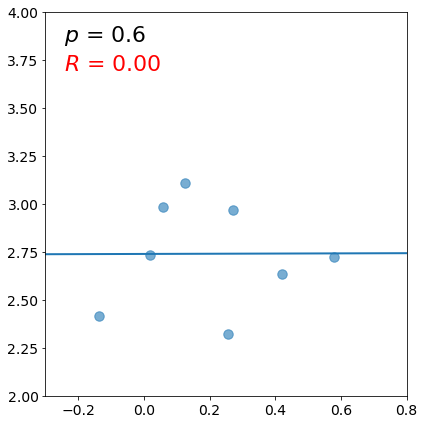

In [14]:
# --- Plot 2: Data with High Noise ---
m = 1
x_noisy = x + np.random.normal(0, np.sqrt(noise_var*m), n_points)
y_noisy = y + np.random.normal(0, np.sqrt(noise_var*m), n_points)
slope_n, intercept_n = tls_regression(x_noisy, y_noisy)
r_value, p_value = pearsonr(x_noisy, y_noisy)

plt.figure(figsize=(6, 6))
plt.scatter(x_noisy, y_noisy, s=90, alpha=.6)
x_line_n = np.linspace(-3, 3, 100)
plt.plot(x_line_n, slope_n * x_line_n + intercept_n, linewidth=2, label='TLS fit (noisy)')
plt.text(0.05, 0.97, f'$p$ = 0.6',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='black')
plt.text(0.05, 0.89, f'$R$ = {r_value:.2f}',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='red')
plt.xlim(-.3, .8)
plt.ylim(2, 4)
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()

plt.show()

<ipython-input-15-c05af357ee80>:27: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-0.1,2.1)


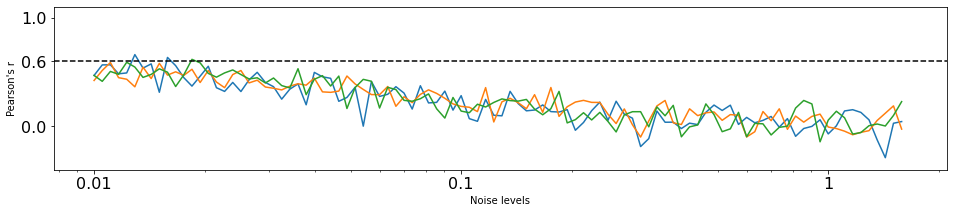

In [15]:
# Define a range of noise levels
noise_levels = np.logspace(-2, 0.2, num=100)
n_traces = 3  # number of replicate traces
N = 100

# Preallocate array to hold Pearson r values
results = np.empty((n_traces, noise_levels.size))

# Simulate and compute Pearson r for each trace and sample size
for t in range(n_traces):
    for idx, noise_var in enumerate(noise_levels):
        data = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, size=N)
        noise = np.random.normal(0, np.sqrt(noise_var), size=data.shape)
        noisy_data = data + noise
        r, _ = pearsonr(noisy_data[:, 0], noisy_data[:, 1])
        results[t, idx] = r

plt.figure(figsize=(16, 3))
for t in range(n_traces):
    plt.plot(noise_levels, results[t])# label=f'Simulation {t+1}')
plt.axhline(0.6, color='black', ls='--', label = 'True R')
plt.xlabel('Noise levels')
plt.ylabel("Pearson's r")
plt.xticks(size=16)
plt.yticks([0, 0.6, 1], size=16)
plt.xscale('log')
plt.xlim(-0.1,2.1)
plt.ylim(-0.4,1.1)
ax = plt.gca()
# Use %g so you get regular decimal notation (e.g. 0.1, 1, 10) instead of 1e-1, 1e0, 1e1
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))

# And adjust tick label sizes
ax.tick_params(axis='x', labelsize=16)
#ax.tick_params(axis='y', labelsize=16)
#plt.legend(fontsize=14)
plt.show()

# MEANS

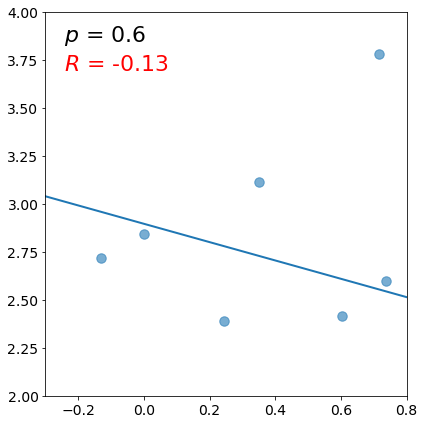

In [16]:
# --- 10 THRESHOLDS ---
m = 1
n_points = 10

x_sum = []
y_sum = []
for i in range(10):
    x_noisy = [x + np.random.normal(0, np.sqrt(noise_var*m), n_points)]
    y_noisy = [y + np.random.normal(0, np.sqrt(noise_var*m), n_points)]
    x_sum += x_noisy
    y_sum += y_noisy
    
x_mean = np.mean(x_sum, axis=0)
y_mean = np.mean(y_sum, axis=0)
    
slope_n, intercept_n = tls_regression(x_mean, y_mean)
r_value, p_value = pearsonr(x_mean, y_mean)

plt.figure(figsize=(6, 6))
plt.scatter(x_mean, y_mean, alpha=.6, s=90)
x_line_n = np.linspace(-3, 3, 100)
plt.plot(x_line_n, slope_n * x_line_n + intercept_n, linewidth=2, label='TLS fit (noisy)')
plt.text(0.05, 0.97, f'$p$ = 0.6',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='black')
plt.text(0.05, 0.89, f'$R$ = {r_value:.2f}',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='red')
plt.xlim(-.3, .8)
plt.ylim(2, 4)
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()

plt.show()

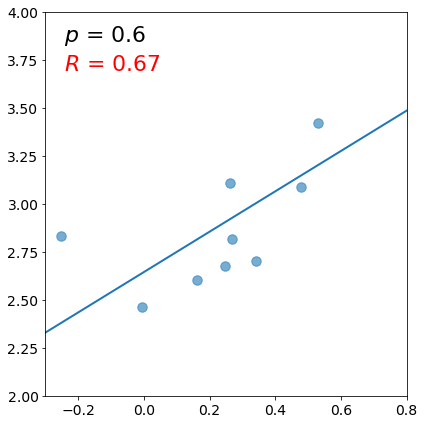

In [17]:
# --- 100 THRESHOLDS ---
m = 0.5
n_points = 10

x_sum = []
y_sum = []
for i in range(100):
    x_noisy = [x + np.random.normal(0, np.sqrt(noise_var*m), n_points)]
    y_noisy = [y + np.random.normal(0, np.sqrt(noise_var*m), n_points)]
    x_sum += x_noisy
    y_sum += y_noisy
    
x_mean = np.mean(x_sum, axis=0)
y_mean = np.mean(y_sum, axis=0)
    
slope_n, intercept_n = tls_regression(x_mean, y_mean)
r_value, p_value = pearsonr(x_mean, y_mean)

plt.figure(figsize=(6, 6))
plt.scatter(x_mean, y_mean, alpha=.6, s=90)
x_line_n = np.linspace(-3, 3, 100)
plt.plot(x_line_n, slope_n * x_line_n + intercept_n, linewidth=2, label='TLS fit (noisy)')
plt.text(0.05, 0.97, f'$p$ = 0.6',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='black')
plt.text(0.05, 0.89, f'$R$ = {r_value:.2f}',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='red')
plt.xlim(-.3, .8)
plt.ylim(2, 4)
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()

plt.show()

In [18]:
def compute_noise_ceiling_splitHalf(measurements):
    """
    Reference: Diedrichsen
    Computes the noise ceiling for a set of repeated measurements.
    Uses split-half reliability across multiple measurements and the geometric mean formula.
    """
    n_measurements = measurements.shape[1]
    
    odd_half = measurements.iloc[:, 1::2]
    even_half = measurements.iloc[:, 0::2]
    
    r_i, _ = pearsonr(np.mean(odd_half, axis=1), np.mean(even_half, axis=1))

    # Apply the extrapolation formula for multiple measurements (2 halves)
    N = 2
    r_m = (N * r_i) / ((r_i * (N - 1)) + 1)

    return r_m

In [38]:
def simulate_estimators(n_points=100, m=1):
    # --- 1) simulate ---
    mu_x, mu_y = 0.25, 2.9
    var_x, var_y, noise_var = 0.0254, 0.0558, 0.02
    rho = 0.6
    cov_xy = rho * np.sqrt(var_x * var_y)
    cov_matrix = np.array([[var_x, cov_xy],
                           [cov_xy, var_y]])

    num_thresholds = np.array([2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30,35,40,45,50,60,70,80,90,100])
    n_traces = 3
    results_raw      = np.empty((n_traces, num_thresholds.size))
    results_unbiased = np.empty((n_traces, num_thresholds.size))

    for t in range(n_traces):
        x, y = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, size=n_points).T
        x_reps, y_reps = [], []

        for idx, thresh in enumerate(num_thresholds):
            # add needed replicates
            for _ in range(thresh - len(x_reps)):
                x_reps.append(x + np.random.normal(0, np.sqrt(noise_var*m), size=n_points))
                y_reps.append(y + np.random.normal(0, np.sqrt(noise_var*m), size=n_points))

            x_stack = np.vstack(x_reps)
            y_stack = np.vstack(y_reps)

            # raw Pearson r
            raw_r, _ = pearsonr(x_stack.mean(axis=0), y_stack.mean(axis=0))

            # reliabilities via split-half
            x_df = pd.DataFrame(x_stack.T)
            y_df = pd.DataFrame(y_stack.T)
            rel_x = compute_noise_ceiling_splitHalf(x_df)
            rel_y = compute_noise_ceiling_splitHalf(y_df)
            noise_ceiling = np.sqrt(rel_x * rel_y)

            results_raw[t, idx]      = raw_r
            results_unbiased[t, idx] = raw_r / noise_ceiling

    # grab the first three default colors
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # --- 2) combined plot ---
    fig, ax = plt.subplots(figsize=(16, 3))
    for t in range(n_traces):
        c = colors[t % len(colors)]
        if t == 0:
            ax.plot(num_thresholds, results_raw[t],
                    linestyle='--', color=c, alpha=0.5,
                    label='Raw')
            ax.plot(num_thresholds, results_unbiased[t],
                    linestyle='-', color=c, alpha=1.0,
                    label='Unbiased')
        else:
            ax.plot(num_thresholds, results_raw[t],
                    linestyle='--', color=c, alpha=0.5)
            ax.plot(num_thresholds, results_unbiased[t],
                    linestyle='-', color=c, alpha=1.0)

    ax.axhline(0.6, color='k', linestyle='--')
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.set_ylim(-0.2, 1.2)
    ax.set_yticks([0, 0.6, 1])
    ax.set_xlabel('Number of thresholds', fontsize=16)
    ax.set_ylabel('R', fontsize=16)
    ax.tick_params(labelsize=16)
    ax.legend(loc='lower right', fontsize=14, frameon=False)
    plt.show()

    # --- 3) raw-only plot ---
    fig, ax = plt.subplots(figsize=(16, 3))
    for t in range(n_traces):
        ax.plot(num_thresholds, results_raw[t],
                linestyle='-', color=colors[t % len(colors)], alpha=1.0)
    ax.axhline(0.6, color='k', linestyle='--')
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.set_ylim(-0.2, 1.2)
    ax.set_yticks([0, 0.6, 1])
    ax.set_xlabel('Number of thresholds', fontsize=16)
    ax.set_ylabel('Raw R', fontsize=16)
    ax.tick_params(labelsize=16)
    plt.show()

    # --- 4) unbiased-only plot ---
    fig, ax = plt.subplots(figsize=(16, 3))
    for t in range(n_traces):
        ax.plot(num_thresholds, results_unbiased[t],
                linestyle='-', color=colors[t % len(colors)], alpha=1.0)
    ax.axhline(0.6, color='k', linestyle='--')
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.set_ylim(-0.2, 1.2)
    ax.set_yticks([0, 0.6, 1])
    ax.set_xlabel('Number of thresholds', fontsize=16)
    ax.set_ylabel('Unbiased R', fontsize=16)
    ax.tick_params(labelsize=16)
    plt.show()


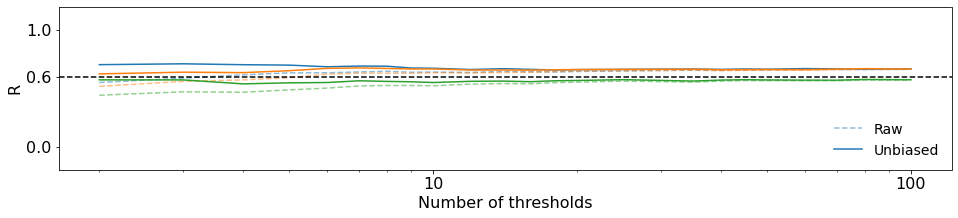

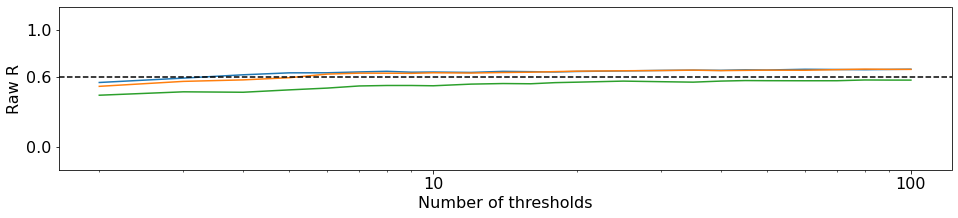

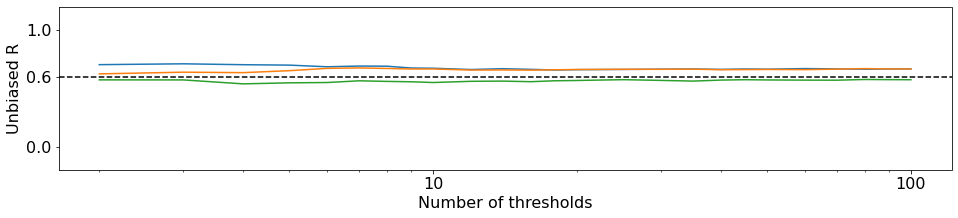

In [48]:
simulate_estimators(n_points=200, m=1)

In [51]:
def simulate_estimators(n_points=100, m=1):
    # --- 1) simulate ---
    mu_x, mu_y = 0.25, 2.9
    var_x, var_y, noise_var = 0.0254, 0.0558, 0.02
    rho = 0.6
    cov_xy = rho * np.sqrt(var_x * var_y)
    cov_matrix = np.array([[var_x, cov_xy],
                           [cov_xy, var_y]])

    num_thresholds = np.array([2,3,4,5,6,7,8,9,10])
    n_traces = 3
    results_raw      = np.empty((n_traces, num_thresholds.size))
    results_unbiased = np.empty((n_traces, num_thresholds.size))

    for t in range(n_traces):
        x, y = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, size=n_points).T
        x_reps, y_reps = [], []

        for idx, thresh in enumerate(num_thresholds):
            # add needed replicates
            for _ in range(thresh - len(x_reps)):
                x_reps.append(x + np.random.normal(0, np.sqrt(noise_var*m), size=n_points))
                y_reps.append(y + np.random.normal(0, np.sqrt(noise_var*m), size=n_points))

            x_stack = np.vstack(x_reps)
            y_stack = np.vstack(y_reps)

            # raw Pearson r
            raw_r, _ = pearsonr(x_stack.mean(axis=0), y_stack.mean(axis=0))

            # reliabilities via split-half
            x_df = pd.DataFrame(x_stack.T)
            y_df = pd.DataFrame(y_stack.T)
            rel_x = compute_noise_ceiling_splitHalf(x_df)
            rel_y = compute_noise_ceiling_splitHalf(y_df)
            noise_ceiling = np.sqrt(rel_x * rel_y)

            results_raw[t, idx]      = raw_r
            results_unbiased[t, idx] = raw_r / noise_ceiling

    # grab the first three default colors
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # --- 2) combined plot ---
    fig, ax = plt.subplots(figsize=(16, 3))
    for t in range(n_traces):
        c = colors[t % len(colors)]
        if t == 0:
            ax.plot(num_thresholds, results_raw[t],
                    linestyle='--', color=c, alpha=0.5,
                    label='Raw')
            ax.plot(num_thresholds, results_unbiased[t],
                    linestyle='-', color=c, alpha=1.0,
                    label='Unbiased')
        else:
            ax.plot(num_thresholds, results_raw[t],
                    linestyle='--', color=c, alpha=0.5)
            ax.plot(num_thresholds, results_unbiased[t],
                    linestyle='-', color=c, alpha=1.0)

    ax.axhline(0.6, color='k', linestyle='--')
    #ax.set_xscale('log')
    #ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.set_ylim(-0.2, 1.2)
    ax.set_yticks([0, 0.6, 1])
    ax.set_xlabel('Number of thresholds', fontsize=16)
    ax.set_ylabel('R', fontsize=16)
    ax.tick_params(labelsize=16)
    ax.legend(loc='lower right', fontsize=14, frameon=False)
    plt.show()

    # --- 3) raw-only plot ---
    fig, ax = plt.subplots(figsize=(16, 3))
    for t in range(n_traces):
        ax.plot(num_thresholds, results_raw[t],
                linestyle='-', color=colors[t % len(colors)], alpha=1.0)
    ax.axhline(0.6, color='k', linestyle='--')
   # ax.set_xscale('log')
    #ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.set_ylim(-0.2, 1.2)
    ax.set_yticks([0, 0.6, 1])
    ax.set_xlabel('Number of thresholds', fontsize=16)
    ax.set_ylabel('Raw R', fontsize=16)
    ax.tick_params(labelsize=16)
    plt.show()

    # --- 4) unbiased-only plot ---
    fig, ax = plt.subplots(figsize=(16, 3))
    for t in range(n_traces):
        ax.plot(num_thresholds, results_unbiased[t],
                linestyle='-', color=colors[t % len(colors)], alpha=1.0)
    ax.axhline(0.6, color='k', linestyle='--')
  #  ax.set_xscale('log')
  #  ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.set_ylim(-0.2, 1.2)
    ax.set_yticks([0, 0.6, 1])
    ax.set_xlabel('Number of thresholds', fontsize=16)
    ax.set_ylabel('Unbiased R', fontsize=16)
    ax.tick_params(labelsize=16)
    plt.show()


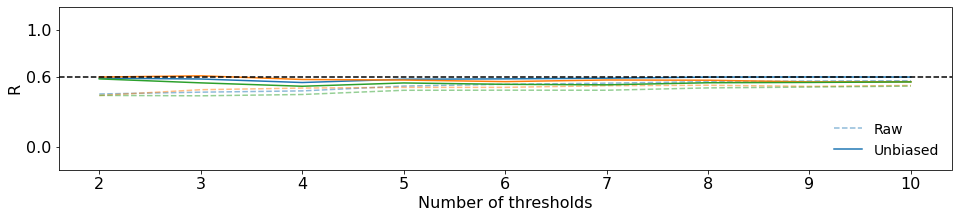

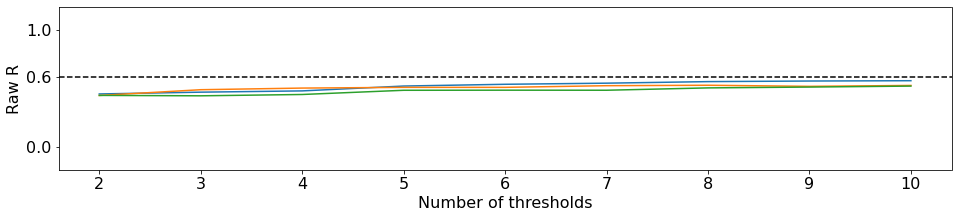

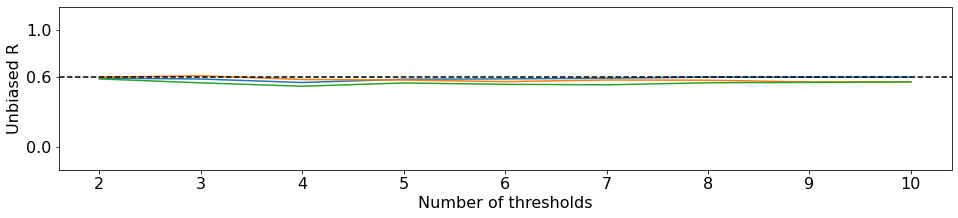

In [70]:
simulate_estimators(n_points=200, m=1)

# ESTIMATOR SELECTION

In [21]:
import numpy as np

def choose_best_estimator(n_samples, n_meas, rho,
                          obs_var_x, meas_var_x,
                          obs_var_y, meas_var_y):
    """
    Decide whether raw or R-ceiling corrected Pearson r
    has lower RMSE, accounting for different variances in X and Y.

    Parameters
    ----------
    n_samples : int
        Number of observers (sample size).
    n_meas : int
        Number of repeated measurements per observer.
    rho : float
        True correlation (–1 to 1).
    obs_var_x : float
        Variance of true X thresholds across observers.
    meas_var_x : float
        Measurement noise variance for X.
    obs_var_y : float
        Variance of true Y thresholds across observers.
    meas_var_y : float
        Measurement noise variance for Y.

    Returns
    -------
    choice : str
        'raw' or 'r-ceiling'
    rmse_raw : float
    rmse_rceil : float
    """
    # reliability for X and Y
    Rx = obs_var_x / (obs_var_x + meas_var_x / n_meas)
    Ry = obs_var_y / (obs_var_y + meas_var_y / n_meas)
    lam = np.sqrt(Rx * Ry)

    # approximate sampling variance of Pearson r
    var_r = (1 - rho**2)**2 / (n_samples - 1)

    # approximate RMSEs
    rmse_raw = np.sqrt(var_r + (rho * (1 - lam))**2)
    rmse_rceil = np.sqrt(var_r / lam**2)

    choice = 'raw' if rmse_raw < rmse_rceil else 'r-ceiling'
    return choice, rmse_raw, rmse_rceil

In [22]:
choice, rmse_raw, rmse_rc = choose_best_estimator(
    n_samples=30,
    n_meas=2,
    rho=0.6,
    obs_var_x=0.0254,
    meas_var_x=0.0141*10,
    obs_var_y=0.056,
    meas_var_y=0.0157*10
)
print(f"Best estimator: {choice}")
print(f"RMSE raw = {rmse_raw:.3f}, RMSE r-ceiling = {rmse_rc:.3f}")

Best estimator: r-ceiling
RMSE raw = 0.418, RMSE r-ceiling = 0.358


# --------------------------------------------------------------------------
# ------------------------------- ARCHIVE -------------------------------
# --------------------------------------------------------------------------

# RELIABILITIES

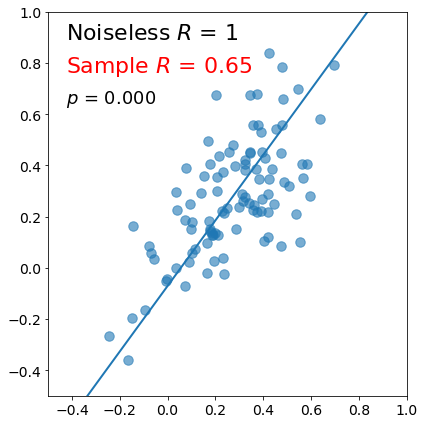

In [23]:
# Parameters: you can change these to your desired values
mu_x, mu_y = 0.25, 0.25
var_x, var_y = 0.025, 0.025
noise_std = np.sqrt(.014)
n_points = 100
rho = 1

# Construct covariance matrix
cov_xy = rho * np.sqrt(var_x * var_y)
cov_matrix = np.array([[var_x, cov_xy],
                       [cov_xy, var_y]])

# Draw samples
x, y = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, size=n_points).T

x_noisy = x + np.random.normal(0, noise_std, n_points)
y_noisy = y + np.random.normal(0, noise_std, n_points)
slope_n, intercept_n = tls_regression(x_noisy, y_noisy)
r_value, p_value = pearsonr(x_noisy, y_noisy)

plt.figure(figsize=(6, 6))
plt.scatter(x_noisy, y_noisy, s=90, alpha=0.6)
x_line_n = np.linspace(-3, 3, 100)
plt.plot(x_line_n, slope_n * x_line_n + intercept_n, linewidth=2, label='TLS fit (noisy)')
plt.text(0.05, 0.97, f'Noiseless $R$ = 1',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='black')
plt.text(0.05, 0.89, f'Sample $R$ = {r_value:.2f}',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='red')
plt.text(0.05, 0.8, f'$p$ = {p_value:.3f}',
         transform=plt.gca().transAxes, va='top', fontsize=18, color='black')
plt.xlim(-.5, 1)
plt.ylim(-.5, 1)
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()

plt.show()

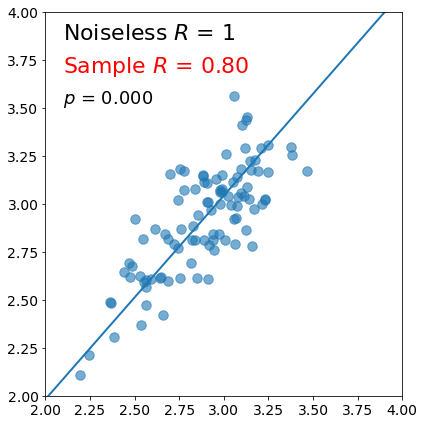

In [24]:
# Parameters
mu_x, mu_y = 2.9, 2.9
var_x, var_y = 0.06, 0.06
noise_std = np.sqrt(.016)
rho = 1

# Construct covariance matrix
cov_xy = rho * np.sqrt(var_x * var_y)
cov_matrix = np.array([[var_x, cov_xy],
                       [cov_xy, var_y]])

# Draw samples
x, y = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, size=n_points).T

x_noisy = x + np.random.normal(0, noise_std, n_points)
y_noisy = y + np.random.normal(0, noise_std, n_points)
slope_n, intercept_n = tls_regression(x_noisy, y_noisy)
r_value, p_value = pearsonr(x_noisy, y_noisy)

plt.figure(figsize=(6, 6))
plt.scatter(x_noisy, y_noisy, s=90, alpha=.6)
x_line_n = np.linspace(-3, 5, 100)
plt.plot(x_line_n, slope_n * x_line_n + intercept_n, linewidth=2)
plt.text(0.05, 0.97, f'Noiseless $R$ = 1',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='black')
plt.text(0.05, 0.89, f'Sample $R$ = {r_value:.2f}',
         transform=plt.gca().transAxes, va='top', fontsize=22, color='red')
plt.text(0.05, 0.8, f'$p$ = {p_value:.3f}',
         transform=plt.gca().transAxes, va='top', fontsize=18, color='black')
plt.xlim(2, 4)
plt.ylim(2, 4)
plt.xticks(size=14)
plt.yticks(size=14)
plt.tight_layout()

plt.show()

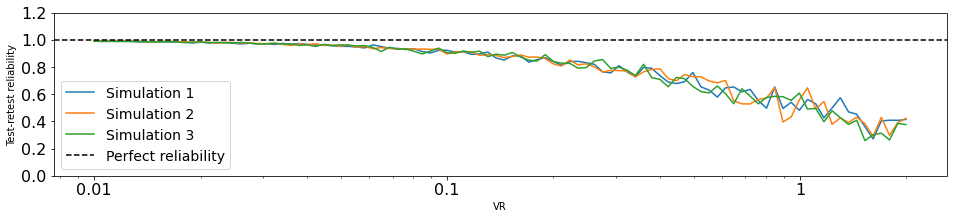

In [25]:
# Parameters
mu_x, mu_y = 2, 2
var_x, var_y = 1, 1
rho = 1
cov_xy = rho * np.sqrt(var_x * var_y)
cov_matrix = np.array([[var_x, cov_xy],
                       [cov_xy, var_y]])
N = 100
data = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, size=N)

# Define a range of noise levels
noise_levels = np.logspace(-2, 0.3, num=100)
n_traces = 3  # number of replicate traces

# Preallocate array to hold Pearson r values
results = np.empty((n_traces, noise_levels.size))

# Simulate and compute Pearson r for each trace and sample size
for t in range(n_traces):
    for idx, noise_var in enumerate(noise_levels):
        noise = np.random.normal(0, np.sqrt(noise_var), size=data.shape)
        noisy_data = data + noise
        r, _ = pearsonr(noisy_data[:, 0], noisy_data[:, 1])
        results[t, idx] = r

plt.figure(figsize=(16, 3))
for t in range(n_traces):
    plt.plot(noise_levels, results[t], label=f'Simulation {t+1}')
plt.axhline(1, color='black', ls='--', label = 'Perfect reliability')
plt.xlabel('VR')
plt.ylabel("Test-retest reliability")
plt.xticks(size=16)
plt.yticks(size=16)
#plt.xlim(0,100)
plt.ylim(0,1.2)
plt.xscale('log')
ax = plt.gca()
# Use %g so you get regular decimal notation (e.g. 0.1, 1, 10) instead of 1e-1, 1e0, 1e1
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))

# And adjust tick label sizes
ax.tick_params(axis='x', labelsize=16)
plt.legend(fontsize=14)
plt.show()